# Deephyper analytics - hyperparameter search study
**path to data file**: /home/rmlans/Desktop/ROMS/Closure_LSTM_NODE/HPS_Runs/node_burgulence/results.csv

for customization please see: https://matplotlib.org/api/matplotlib_configuration_api.html

## Setup & Data loading

In [1]:
path_to_data_file = '/home/rmlans/Desktop/ROMS/Closure_LSTM_NODE/HPS_Runs/node_burgulence/results.csv'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from datetime import datetime
from tqdm import tqdm
from IPython.display import display, Markdown

width = 21
height = 13

matplotlib.rcParams.update({
    'font.size': 21,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 72, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': 21,
    'ytick.labelsize': 21})

df = pd.read_csv(path_to_data_file)

display(Markdown(f'The search did _{df.count()[0]}_ **evaluations**.'))

df.head()

The search did _734_ **evaluations**.

,Sequence size,Momentum,decay,Learning rate,Batch Size,Epochs,Neurons,Loss,elapsed_sec
0,5,0.998322,0.000008,0.007410,21,546,82,-0.000029,1436.364776
1,5,0.998049,0.000007,0.019370,8,706,36,-0.000041,664.044760
2,7,0.998437,0.000004,0.003638,14,1132,43,-0.000054,2605.795049
3,6,0.991194,0.000008,0.019772,29,204,84,-0.000069,2147.076856
4,6,0.994246,0.000007,0.023533,23,1117,93,-0.000080,3832.579206


## Statistical summary

In [3]:
df.describe()

,Sequence size,Momentum,decay,Learning rate,Batch Size,Epochs,Neurons,Loss,elapsed_sec
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,17.514986,0.994627,0.000004,0.075896,17.719346,687.850136,54.829700,-0.074980,8459.083389
std,7.151197,0.002667,0.000003,0.031592,7.479137,322.528943,26.282382,0.241737,5804.647126
min,5.000000,0.990003,0.000001,0.000640,5.000000,200.000000,10.000000,-2.988905,333.626602
25%,11.250000,0.992296,0.000002,0.052947,11.000000,386.000000,32.000000,-0.047675,3411.223899
50%,18.000000,0.994705,0.000003,0.096550,17.500000,700.000000,54.000000,-0.014095,7073.448166
75%,23.000000,0.997041,0.000006,0.098548,24.000000,973.750000,78.750000,-0.004708,12755.004951
max,30.000000,0.998994,0.000010,0.099982,30.000000,1197.000000,100.000000,-0.000029,21381.056845


## Search trajectory

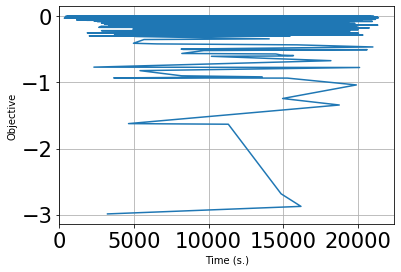

In [4]:
plt.plot(df.elapsed_sec, df.Loss)
plt.ylabel('Objective')
plt.xlabel('Time (s.)')
plt.xlim(0)
plt.grid()
plt.show()

## Pairplots

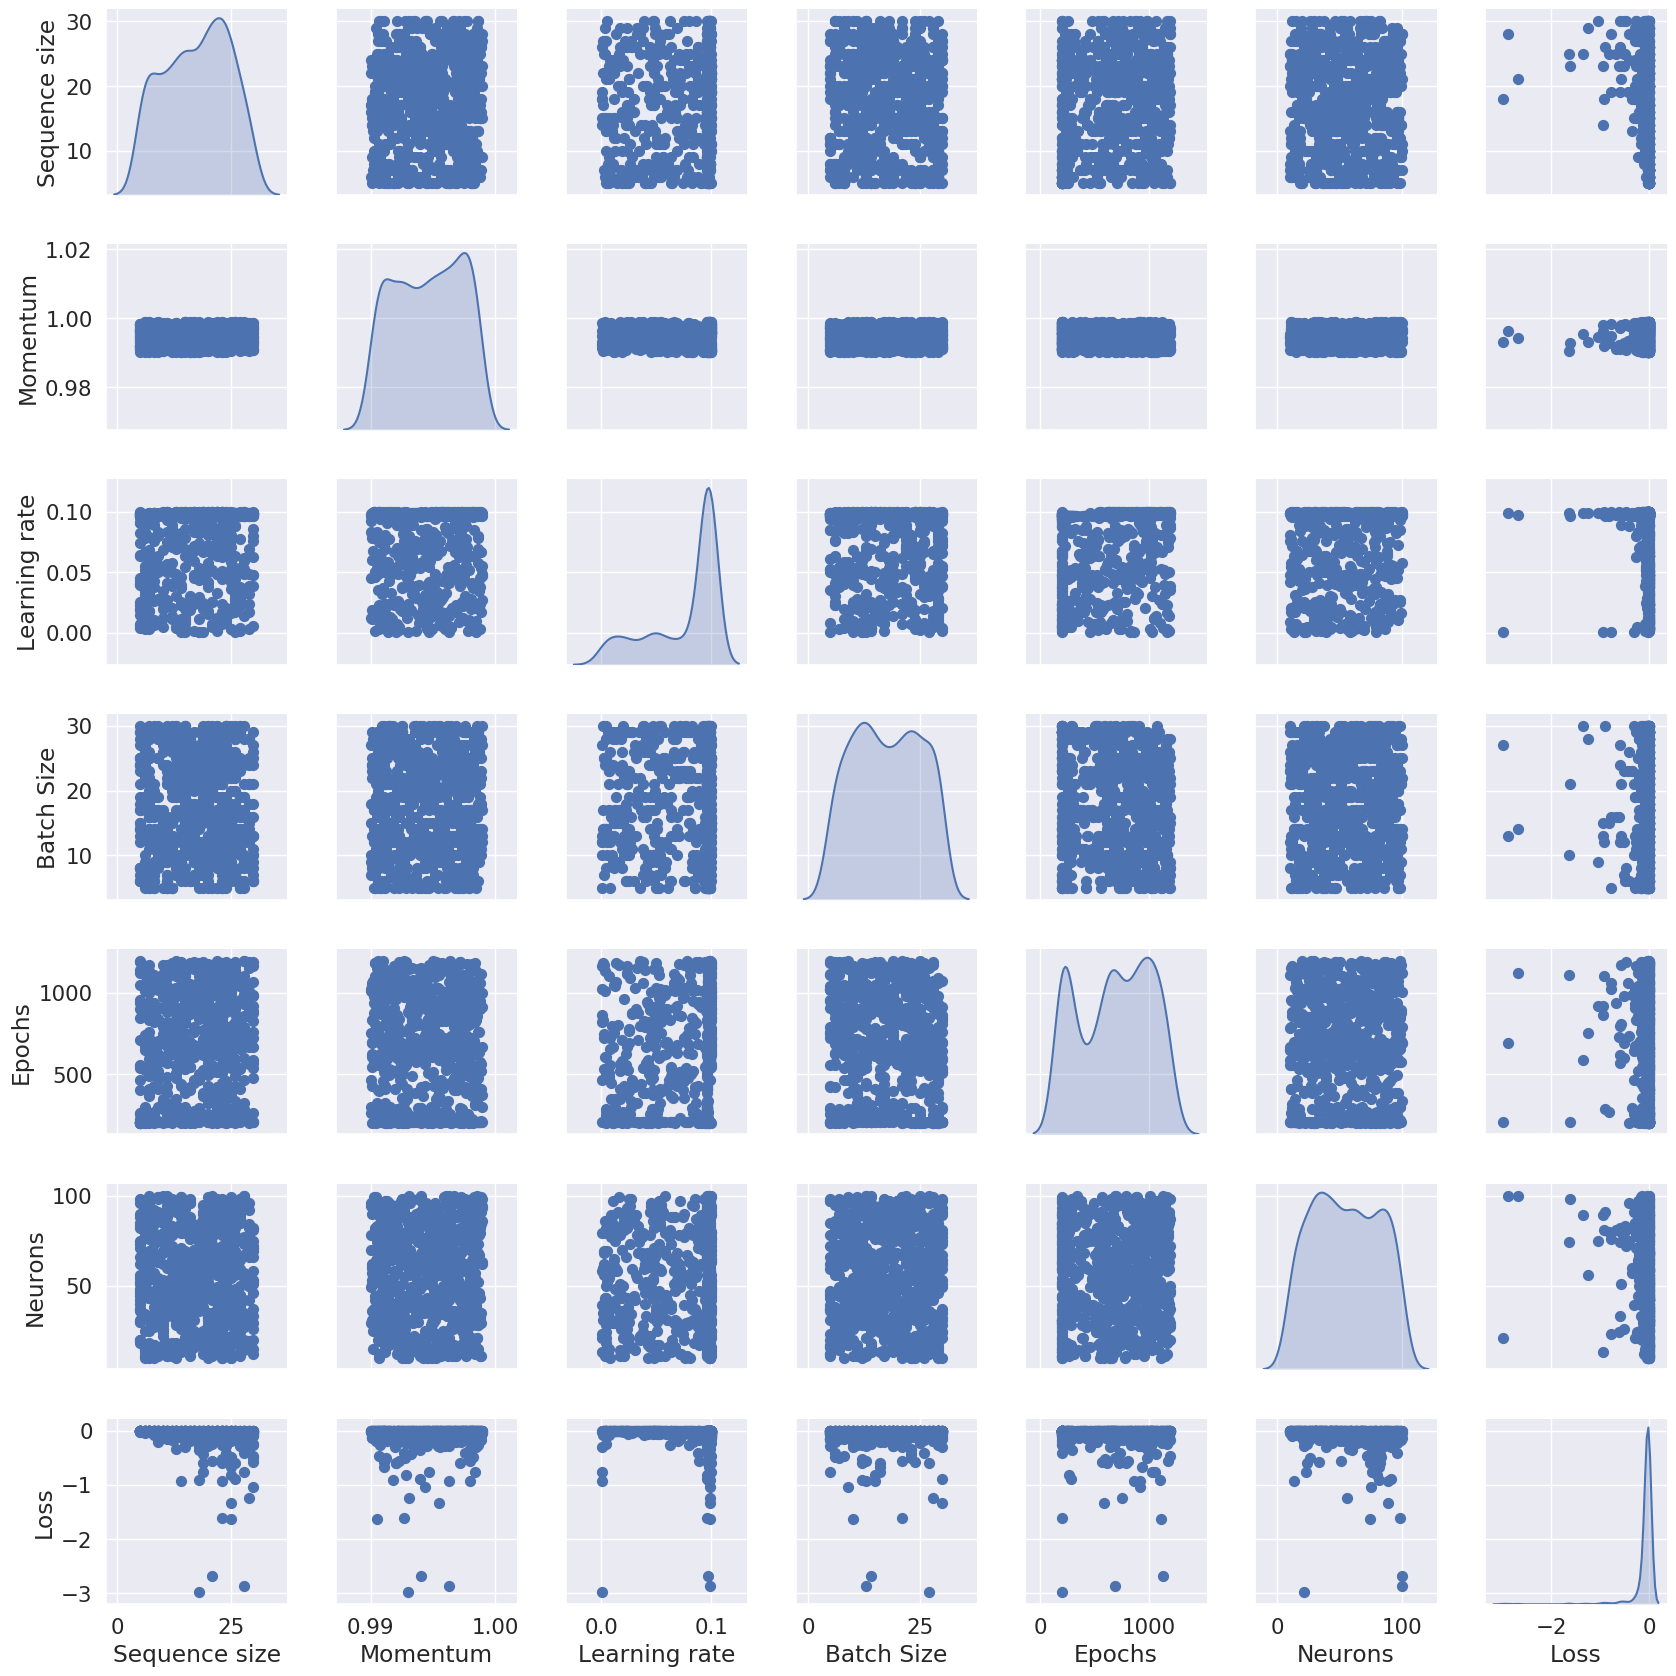

In [11]:
not_include = ['elapsed_sec','decay']
sns.set(font_scale=1.4)
g = sns.pairplot(df.loc[:, filter(lambda n: n not in not_include, df.columns)],
                diag_kind="kde", markers="o",
                plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                diag_kws=dict(shade=True))
plt.tight_layout(pad=2)
plt.savefig('Figure_1.png')
plt.show()

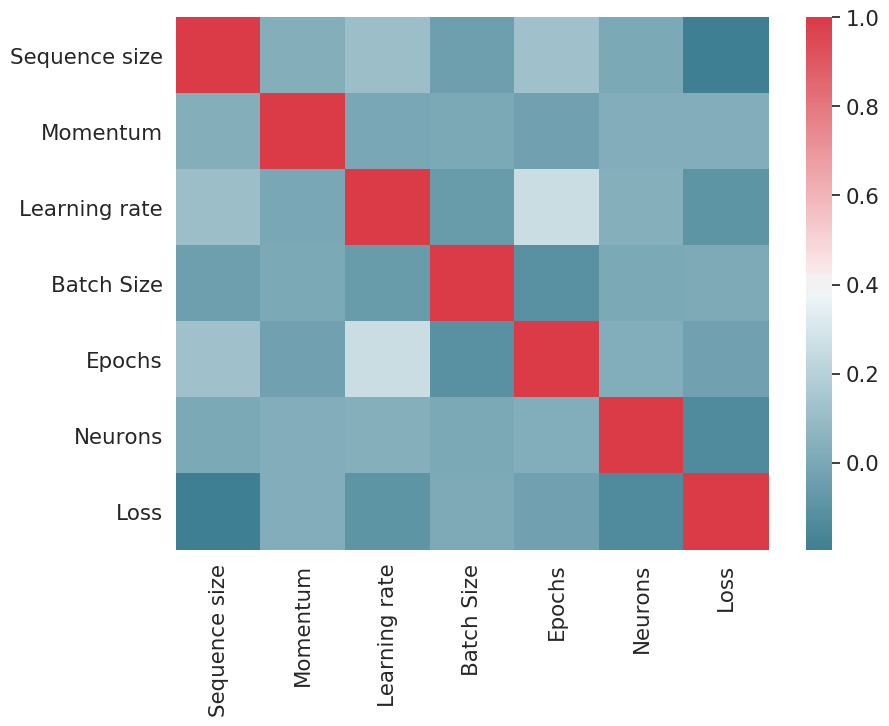

In [12]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
corr = df.loc[:, filter(lambda n: n not in not_include, df.columns)].corr()
sns_plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.tight_layout(pad=2)
plt.savefig('Figure_24.png')
plt.show()

## Best objective

In [14]:
i_max = df.Loss.idxmax()
df.iloc[i_max]

Sequence size       5.000000
Momentum            0.998322
decay               0.000008
Learning rate       0.007410
Batch Size         21.000000
Epochs            546.000000
Neurons            82.000000
Loss               -0.000029
elapsed_sec      1436.364776
Name: 0, dtype: float64

In [8]:
dict(df.iloc[i_max])

{'batch_tsteps': 5.0,
 'beta': 0.9983224343137221,
 'decay': 7.64081987705119e-06,
 'lr': 0.007409896603378,
 'num_batches': 21.0,
 'num_epochs': 546.0,
 'num_neurons': 82.0,
 'objective': -2.85730252261343e-05,
 'elapsed_sec': 1436.36477589607}

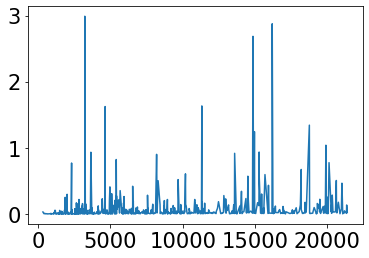

In [9]:
data = np.loadtxt('results.csv',delimiter=',',skiprows=1)
data = data[data[:,-1].argsort()]

plt.figure()
plt.plot(data[:,-1],-data[:,-2])
plt.show()